In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# Thanks to...<br>

**Official Documentation**
> [sci-kit learn: TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)<br>
> [sci-kit learn: TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)<br>
> [sci-kit learn: TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)<br>
> [matplotlib: Axes3D](https://matplotlib.org/3.1.1/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html)<br>
> [matplotlib: Axes3D.scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)<br>
> [matplotlib: Axes3D.scatter](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter)<br>
> [bokeh: ColumnDataSource](https://docs.bokeh.org/en/latest/docs/user_guide/data.html)<br>
> [bokeh: HoverTool](https://docs.bokeh.org/en/latest/docs/user_guide/tools.html)<br>
> [gensim: Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html)<br>
> [pyspellchecker](https://pyspellchecker.readthedocs.io/en/latest/)<br>

**Kaggle Kernel**
> [Disaster Tweets: Understanding Data & Basic model](https://www.kaggle.com/ratan123/disaster-tweets-understanding-data-basic-model#3.-Resampling-the-training-data)<br>
> [Comprehensive NLP Tutorial-1:ML Perspective](https://www.kaggle.com/kksienc/comprehensive-nlp-tutorial-1-ml-perspective)<br>


**Other Resources**
> [웹 플롯을 위한 bokeh 패키지 소개](https://datascienceschool.net/view-notebook/b03af554a1494f159fc94d65d70fe7b2/) - explains bokeh library<br>


<a id='top'></a>
# Table of Contents
1. [Settings](#1)
    1. [Library and Settings](#1.1)
        1. [Import Library](#1.1.1)
        2. [Library Setting](#1.1.2)
    2. [Load Data](#1.2)
        1. [Data Shape](#1.2.1)
        2. [Data Sample](#1.2.2)
        3. [Combine Data for Text Processing](#1.2.3)
2. [Text Cleaning](#2)
    1. [Standardization](#2.1)
        1. [Lowercase](#2.1.1)
    2. [Remove Irrelevant](#2.2)
        1. [Remove Contraction](#2.2.1)
        2. [Remove URL](#2.2.2)
        3. [Remove Number](#2.2.3)
        4. [Remove Punctuation](#2.2.4)
        5. [Remove Non-English](#2.2.5)
        6. [Remove Stopword](#2.2.6)
        7. [Remove Space](#2.2.7)
    3. [Normalization](#2.3)
        1. [Stemming](#2.3.1)
        2. [Lemmatization](#2.3.2)
3. [Vectorize Text](#3)
    1. [Index Encoding](#3.1)
    2. [TF-IDF Encoding](#3.2)
    3. [LSA(TF-IDF + SVD) Encoding](#3.3)
        1. [Visualization 3D](#3.3.1)
        2. [Visualizing 2D (with T-SNE)](#3.3.2)
    4. [Doc2Vec Encoding](#3.4)
3. [Data Modeling](#4)
    1. [Index Encoding + RNN Modeling](#4.1)
        1. [Make Train and Test Data](#4.1.1)
        2. [RNN Modeling](#4.1.2)
        3. [Performance Function](#4.1.3)
        4. [Training Hyper Parameter](#4.1.4)
        5. [Checkpoint and Summary](#4.1.5)
        6. [Training](#4.1.6)
        7. [Evaluation](#4.1.7)
    2. [Doc2Vec Encoding + DNN Modeling](#4.2)
        1. [Make Train and Test Data](#4.2.1)
        2. [DNN Modeling](#4.2.2)
        3. [Performance Function](#4.2.3)
        4. [Training Hyper Parameter](#4.2.4)
        5. [Checkpoint and Summary](#4.2.5)
        6. [Training](#4.2.6)
        7. [Evaluation](#4.2.7)


# 1. Settings<a id="1"></a>
[Back to Top](#top)

## 1.1. Library and Settings <a id="1.1"></a>
[Back to Top](#top)

### 1.1.1. Import Library <a id="1.1.1"></a>
[Back to Top](#top)

In [1]:
import os

### for numeric
import numpy as np

### for dataframe
import pandas as pd

### for visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

### for NLP(Natural Language Processing)
from string import punctuation

import re

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

from gensim.models.doc2vec import Doc2Vec, TaggedDocument

### for deep learning
import tensorflow as tf
import tensorflow.keras as keras

unable to import 'smart_open.gcs', disabling that module


### 1.1.2. Library Setting <a id="1.1.2"></a>
[Back to Top](#top)

In [2]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
pd.options.mode.chained_assignment = None

In [3]:
%matplotlib inline

In [4]:
### only for local execution
data_path = os.path.join(os.getcwd(), 'nltk_data')
if os.path.exists(data_path):
    nltk.data.path.append(data_path)
else:
    nltk.download()

## 1.2. Load Data <a id="1.2"></a>
[Back to Top](#top)

In [5]:
# raw_train = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')
# raw_test = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv')
raw_train = pd.read_csv('./data/train.csv')
raw_test = pd.read_csv('./data/test.csv')

### 1.2.1. Data Shape <a id="1.2.1"></a>
[Back to Top](#top)

In [6]:
print('Shape of Train\tData >> {}'.format(raw_train.shape))
print('Shape of Test\tData >> {}'.format(raw_test.shape))

Shape of Train	Data >> (7613, 5)
Shape of Test	Data >> (3263, 4)


### 1.2.2. Data Sample <a id="1.2.2"></a>
[Back to Top](#top)

In [7]:
raw_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [8]:
raw_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


### 1.2.3. Combine Data for Text Processing <a id="1.2.3"></a>
[Back to Top](#top)

No matter the recoard has target value or not, it has text to be processed.<br> 
Therefore combine the all data in train and test to get text.<br>
Test data don't have target value, therefore it is necessary to filled with dummy value(-1).<br>
Data is ordered in descending order based on target value (1 -> 0 -> -1).

In [9]:
combined_test = raw_test.copy()
combined_test['target'] = -1
combined_test.head()

,id,keyword,location,text,target
0,0,NaN,NaN,Just happened a terrible car crash,-1
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",-1
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",-1
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,-1
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,-1


In [10]:
combined_train = raw_train.copy()
combined_train = pd.concat([raw_train[raw_train['target'] == 1], raw_train[raw_train['target'] == 0]], ignore_index=True)
combined_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
combined = pd.concat([combined_train, combined_test], ignore_index=True)
combined

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1


# 2. Text Cleaning <a id="2"></a>
[Back to Top](#top)

## 2.1. Standardization <a id="2.1"></a>
[Back to Top](#top)

### 2.1.1 Lowercase <a id="2.1.1"></a>
[Back to Top](#top)

In [12]:
def to_lower(text):
    return text.lower()

In [13]:
'''Test'''
temp = 'Hello WORld'
print(to_lower(temp))

hello world


In [14]:
combined['text_cleaned'] = combined['text'].apply(lambda x: to_lower(x))
combined

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1,earthquake safety los angeles ûò safety faste...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1,storm in ri worse than last hurricane. my city...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1,green line derailment in chicago http://t.co/u...
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1,meg issues hazardous weather outlook (hwo) htt...


## 2.2. Remove Irrelevant <a id="2.2"></a>
[Back to Top](#top)

### 2.2.1. Remove Contraction <a id="2.2.1"></a>
[Back to Top](#top)

In [15]:
NON_OFFICLA_QUOTES = ["’", "‘", "´", "`"]
CONSTRACTIONS = {"ain't": "is not", "aren't": "are not","can't": "cannot", "can't've": "cannot have", "'cause": "because", "could've": "could have", "couldn't": "could not", "couldn't've": "could not have","didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not",  "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have","that's": "that is", "there'd": "there would", "there'd've": "there would have","there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }

In [16]:
def remove_contraction(text):
    for char in NON_OFFICLA_QUOTES:
        text = text.replace(char, "'")
    
    removed = [CONSTRACTIONS[t] if t in CONSTRACTIONS else t for t in text.split()]
    return ' '.join(removed)

In [17]:
'''Test'''
temp = "I ain't do 'cause I can't"
print(remove_contraction(temp))

I is not do because I cannot


In [18]:
combined['text_cleaned'] = combined['text_cleaned'].apply(lambda x: remove_contraction(x))
combined

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1,earthquake safety los angeles ûò safety faste...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1,storm in ri worse than last hurricane. my city...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1,green line derailment in chicago http://t.co/u...
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1,meg issues hazardous weather outlook (hwo) htt...


### 2.2.2. Remove URL <a id="2.2.2"></a>
[Back to Top](#top)

In [19]:
def remove_url(text):
    text = re.sub(r'https?://\S+|www.\S+', '', text)
    return text

In [20]:
'''Test'''
temp = 'http://www.google.com and https://www.google.com and www.google.com are all fine'
print(remove_url(temp))

 and  and  are all fine


In [21]:
combined['text_cleaned'] = combined['text_cleaned'].apply(lambda x: remove_url(x))
combined

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,"13,000 people receive #wildfires evacuation or..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1,earthquake safety los angeles ûò safety faste...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1,storm in ri worse than last hurricane. my city...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1,green line derailment in chicago
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1,meg issues hazardous weather outlook (hwo)


### 2.2.3. Remove Number <a id="2.2.3"></a>
[Back to Top](#top)

In [22]:
def remove_number(text):
    text = re.sub(r'[0-9]+', '', text)
    return text

In [23]:
'''Test'''
temp = '301 Hello 332017World93!!!'
print(remove_number(temp))

 Hello World!!!


In [24]:
combined['text_cleaned'] = combined['text_cleaned'].apply(lambda x: remove_number(x))
combined

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this #earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask. canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to 'shelter in place' are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,", people receive #wildfires evacuation orders ..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby #alaska as ...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1,earthquake safety los angeles ûò safety faste...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1,storm in ri worse than last hurricane. my city...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1,green line derailment in chicago
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1,meg issues hazardous weather outlook (hwo)


### 2.2.4 Remove Punctuation <a id="2.2.4"></a>
[Back to Top](#top)

In [25]:
def remove_punctuation(text):
    text = re.sub(r'[' + punctuation + ']+', ' ', text)
    return text

In [26]:
'''Test'''
temp = 'Hello-World!!! is the basic.??!! Is not'
print(remove_punctuation(temp))

Hello World  is the basic  Is not


In [27]:
combined['text_cleaned'] = combined['text_cleaned'].apply(lambda x: remove_punctuation(x))
combined

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as ...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1,earthquake safety los angeles ûò safety faste...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1,storm in ri worse than last hurricane my city...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1,green line derailment in chicago
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1,meg issues hazardous weather outlook hwo


### 2.2.5. Remove Non-English <a id="2.2.5"></a>
[Back to Top](#top)

In [28]:
def remove_non_english(text):
    text = re.sub('[^a-zA-Z\s]', '', text)
    return text

In [29]:
'''Test'''
temp = '안녕하세요 is korean hello'
print(remove_non_english(temp))

 is korean hello


In [30]:
combined['text_cleaned'] = combined['text_cleaned'].apply(lambda x: remove_non_english(x))
combined

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,our deeds are the reason of this earthquake m...
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,all residents asked to shelter in place are ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders ...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,just got sent this photo from ruby alaska as ...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1,earthquake safety los angeles safety fastener...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1,storm in ri worse than last hurricane my city...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1,green line derailment in chicago
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1,meg issues hazardous weather outlook hwo


### 2.2.6. Remove Stopword <a id="2.2.6"></a>
[Back to Top](#top)

In [31]:
def remove_stopword(text):
    stop = stopwords.words('english')
    removed = [t for t in text.split() if t not in stop]
    return ' '.join(removed)

In [32]:
'''Test'''
temp = 'i me mice are the the what?'
print(remove_stopword(temp))

mice what?


In [33]:
combined['text_cleaned'] = combined['text_cleaned'].apply(lambda x: remove_stopword(x))
combined

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1,earthquake safety los angeles safety fasteners...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1,storm ri worse last hurricane city amp others ...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1,green line derailment chicago
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1,meg issues hazardous weather outlook hwo


### 2.2.7. Remove Space <a id="2.2.7"></a>
[Back to Top](#top)

In [34]:
def remove_space(text):
    text = text.strip()
    text = re.sub('\s[\s]+', ' ', text)
    return text

In [35]:
'''Test'''
temp = '   Helll llo wo   rld'
print(remove_space(temp))

Helll llo wo rld


In [36]:
combined['text_cleaned'] = combined['text_cleaned'].apply(lambda x: remove_space(x))
combined

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1,earthquake safety los angeles safety fasteners...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1,storm ri worse last hurricane city amp others ...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1,green line derailment chicago
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1,meg issues hazardous weather outlook hwo


## 2.3. Normalization <a id="2.3"></a>
[Back to Top](#top)

There are two methods to normalize text data, Stemming and Lemmatizing.<br>
Choose either Stemming or Lemmatizing would be text normalization.<br>
In this kernel, lemmatization is used.<br>

### 2.3.1. Stemming <a id="2.3.1"></a>
[Back to Top](#top)

In [37]:
def stem(text):
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(t) for t in word_tokenize(text)]
    return ' '.join(stemmed)

In [38]:
'''Test'''
temp = 'What are the elephants doing now?'
print(stem(temp))

what are the eleph do now ?


### 2.3.2. Lemmatization <a id="2.3.2"></a>
[Back to Top](#top)

In [39]:
def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word, pos=pos[0].lower()) if pos[0] in ['A', 'N', 'V'] else lemmatizer.lemmatize(word) for word, pos in pos_tag(word_tokenize(text))]
    return ' '.join(lemmatized)

In [40]:
'''Test'''
temp = 'What are the elephants doing now?'
print(lemmatize(temp))

What be the elephant do now ?


In [41]:
combined['text_cleaned'] = combined['text_cleaned'].apply(lambda x: lemmatize(x))
combined

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident ask shelter place notify officer evac...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,get sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...,...,...
10871,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,-1,earthquake safety los angeles safety fastener ...
10872,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,-1,storm ri worse last hurricane city amp others ...
10873,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,-1,green line derailment chicago
10874,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,-1,meg issue hazardous weather outlook hwo


# 3. Vectorize Text <a id="3"></a>
[Back to Top](#top)

Computers cannot understand the text itself, it should be converted to numerical data, which is called Text Encoding or Vectorizing.<br>
To vectorize text we would extrackt only cleaned text processed eariler.<br>
Also split train and test corpus for traing later.

In [42]:
corpus_train = list(combined.loc[combined['target'] != -1, 'text_cleaned'])
corpus_test = list(combined.loc[combined['target'] == -1, 'text_cleaned'])
corpus = corpus_train + corpus_test
print('Length of Train\t:{}'.format(len(corpus_train)))
print('Length of Test\t:{}'.format(len(corpus_test)))
print('Length of All\t:{}'.format(len(corpus)))

Length of Train	:7613
Length of Test	:3263
Length of All	:10876


In [43]:
train_targets = list(combined.loc[combined['target'] != -1, 'target'])
assert len(corpus_train) == len(train_targets)

## 3.1. Index Encoding <a id="3.1"></a>
[Back to Top](#top)

Encode the word based one the index.<br>
Processed Later in Keras Embedding Model.<br> 

In [44]:
def get_index_dictionary(corpus):
    words = set()
    for sentence in corpus:
        for word in sentence.split():
            words.add(word)
    
    words = ['<pad>'] + list(sorted(words))
    
    word2idx = {word: idx for idx, word in enumerate(words)}
    idx2word = {idx: word for idx, word in enumerate(words)}
    
    return word2idx, idx2word

In [45]:
def index_encoding(corpus, dictionary):
    encoded = list(map(lambda sentence: [dictionary[word] for word in sentence.split()], corpus))
    return encoded

In [46]:
'''Test'''
temp = [
    'i am doing well',
    'i am doing what',
    'i am doing so what'
]
word2idx, idx2word = get_index_dictionary(temp)
print('Dictionary >>\n{}'.format(idx2word))
print(index_encoding(temp, word2idx))

Dictionary >>
{0: '<pad>', 1: 'am', 2: 'doing', 3: 'i', 4: 'so', 5: 'well', 6: 'what'}
[[3, 1, 2, 5], [3, 1, 2, 6], [3, 1, 2, 4, 6]]


In [47]:
word2idx, idx2word = get_index_dictionary(corpus)
index_encoded_train = index_encoding(corpus_train, word2idx)
index_encoded_test = index_encoding(corpus_test, word2idx)

print('Shape of Train\t:{}'.format(np.array(index_encoded_train).shape))
print('Shape of Test\t:{}'.format(np.array(index_encoded_test).shape))
print('Sample Data >>\n{}'.format(index_encoded_train))

Shape of Train	:(7613,)
Shape of Test	:(3263,)
Sample Data >>
[[3879, 12755, 4669, 9695, 439, 5769, 16348], [5762, 5582, 10608, 8710, 13317, 13617, 2335], [13023, 903, 14026, 11963, 10941, 11124, 5137, 14026, 11963, 11335, 5229], [11746, 12777, 17257, 5137, 11335, 2289], [6184, 13865, 11862, 13417, 369, 14391, 17258, 12148, 13704], [13269, 16537, 2289, 7297, 2931, 4192, 4583, 8738, 3377, 5582, 2256, 17257], [5673, 4216, 6857, 12619, 2518, 5640, 5673, 14955, 9519, 3063, 14709, 791], [15971, 6979, 13812, 5582, 17387], [4874, 5137, 6703, 2125, 139, 14955], [251, 15983, 3084, 791], [15759, 11746, 4146, 6852, 17035, 5374], [6613, 14571, 15332, 6184, 5673, 6612, 16931, 13797, 9118, 14571, 15332, 6337, 10482, 6337, 10482, 6012, 5674], [12619, 5673, 5683, 15333, 15332, 3798, 9262, 3370], [5673, 1190, 10453, 839, 1190], [3684, 13704, 2179, 10379, 2397, 3431, 1961], [1336, 17220, 9587, 53], [254, 1955, 10697, 10770, 5633, 13902, 53, 19], [7592, 11122, 48, 13902, 53], [1253, 1998, 7953, 16322, 23

## 3.2. TF-IDF Encoding <a id="3.2"></a>
[Back to Top](#top)

In [48]:
def get_tfidf_vectorizer(corpus, ngram_range=(1, 3), min_df=5):
    vectorizer = TfidfVectorizer(analyzer='word', ngram_range=ngram_range, min_df=min_df)
    encoded = vectorizer.fit_transform(corpus)
    return vectorizer, encoded

In [49]:
def tfidf_encoding(corpus, vectorizer):
    return vectorizer.transform(corpus)

In [50]:
'''Test'''
temp = [
    'i am doing well',
    'i am doing what',
    'i am doing so what'
]
vec, enc = get_tfidf_vectorizer(temp, ngram_range=(1, 1), min_df=1)
print('Total Encoded')
print(enc)

print('Part Encoded')
print(tfidf_encoding(temp, vec))

Total Encoded
  (0, 3)	0.7674945674619879
  (0, 1)	0.4532946552278861
  (0, 0)	0.4532946552278861
  (1, 4)	0.6732546652684398
  (1, 1)	0.5228423068642596
  (1, 0)	0.5228423068642596
  (2, 2)	0.6628399823470976
  (2, 4)	0.5041068915759233
  (2, 1)	0.39148397136265967
  (2, 0)	0.39148397136265967
Part Encoded
  (0, 3)	0.7674945674619879
  (0, 1)	0.4532946552278861
  (0, 0)	0.4532946552278861
  (1, 4)	0.6732546652684398
  (1, 1)	0.5228423068642596
  (1, 0)	0.5228423068642596
  (2, 4)	0.5041068915759233
  (2, 2)	0.6628399823470976
  (2, 1)	0.39148397136265967
  (2, 0)	0.39148397136265967


In [51]:
vectorizer, tfidf_encoded = get_tfidf_vectorizer(corpus)
tfidf_encoded_train = tfidf_encoding(corpus_train, vectorizer)
tfidf_encoded_test = tfidf_encoding(corpus_test, vectorizer)

print('Shape of Train\t:{}'.format(tfidf_encoded_train.shape))
print('Shape of Test\t:{}'.format(tfidf_encoded_test.shape))
print('Sample Data >>\n{}'.format(tfidf_encoded_train))

Shape of Train	:(7613, 5711)
Shape of Test	:(3263, 5711)
Sample Data >>
  (0, 4052)	0.41846422103883685
  (0, 3081)	0.3614531040936746
  (0, 1952)	0.5316724227289493
  (0, 1493)	0.39509943998077474
  (0, 119)	0.5054307239254598
  (1, 3354)	0.3384887684518638
  (1, 2707)	0.391490671022105
  (1, 1944)	0.3792677120799715
  (1, 1943)	0.3268193446408467
  (1, 1868)	0.49182689940223095
  (1, 1858)	0.23704240905988055
  (1, 752)	0.428278792386723
  (2, 4475)	0.6156370872544896
  (2, 4150)	0.29102204229153095
  (2, 3743)	0.48996363437658497
  (2, 3563)	0.23633747434936445
  (2, 3500)	0.2483632020222102
  (2, 1671)	0.2511125094978469
  (2, 1623)	0.22929918868715668
  (2, 294)	0.2511125094978469
  (3, 5537)	0.3345535800281561
  (3, 4056)	0.4795080460143158
  (3, 3684)	0.279790941670653
  (3, 3563)	0.37301116997173883
  (3, 1626)	0.459319762054573
  :	:
  (7609, 4759)	0.20481513119333702
  (7609, 2443)	0.2652539796267863
  (7609, 2442)	0.2652539796267863
  (7609, 2441)	0.26145086884514845
  (7609

## 3.3. LSA(TF-IDF + SVD) Encoding <a id="3.3"></a>
[Back to Top](#top)

In [52]:
def svd_encoding(corpus, vectorizer, n_components=50):
    tfidf_encoded = tfidf_encoding(corpus, vectorizer)
    svd = TruncatedSVD(n_components=n_components)
    svd_encoded = svd.fit_transform(tfidf_encoded)
    return svd_encoded

In [53]:
vectorizer, tfidf_encoded = get_tfidf_vectorizer(corpus)
svd_encoded_train = svd_encoding(corpus_train, vectorizer)
svd_encoded_test = svd_encoding(corpus_test, vectorizer)

print('Shape of Train\t:{}'.format(svd_encoded_train.shape))
print('Shape of Test\t:{}'.format(svd_encoded_test.shape))
print('Sample Data >>\n{}'.format(svd_encoded_train))

Shape of Train	:(7613, 50)
Shape of Test	:(3263, 50)
Sample Data >>
[[ 0.02659245  0.00104532  0.00114751 ...  0.00993989  0.01667468
  -0.00631383]
 [ 0.09117974  0.21205218 -0.00328846 ...  0.00150907 -0.00626122
   0.02057254]
 [ 0.03039121  0.00971677  0.00033737 ... -0.01696801  0.01366907
   0.00261572]
 ...
 [ 0.04430773 -0.00862143  0.00546377 ...  0.05310947  0.06211527
   0.05480094]
 [ 0.02525382 -0.00846058 -0.00293649 ... -0.00562634  0.00110242
  -0.00086875]
 [ 0.05475064 -0.00677331  0.00354623 ... -0.01646402 -0.01574787
  -0.02079   ]]


### 3.3.1. Visualization 3D <a id="3.3.1"></a>
[Back to Top](#top)

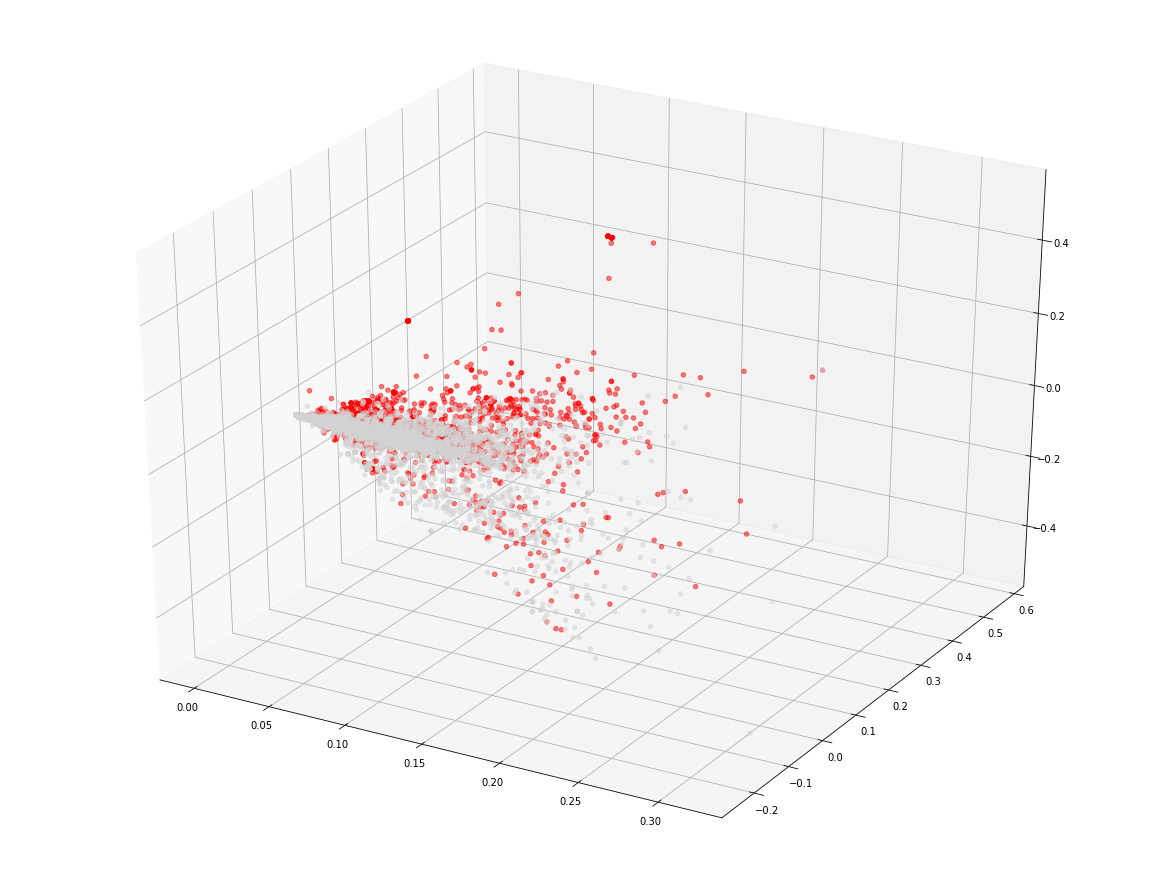

In [54]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig)
colormap = ['lightgrey', 'red']
color = list(map(lambda x: colormap[x], train_targets))
ax.scatter3D(
    svd_encoded_train[:, 0],
    svd_encoded_train[:, 1],
    svd_encoded_train[:, 2],
    c=color,
    alpha=0.5
)

plt.show()

### 3.3.2. Visualizing 2D (with T-SNE) <a id="3.3.2"></a>
[Back to Top](#top)

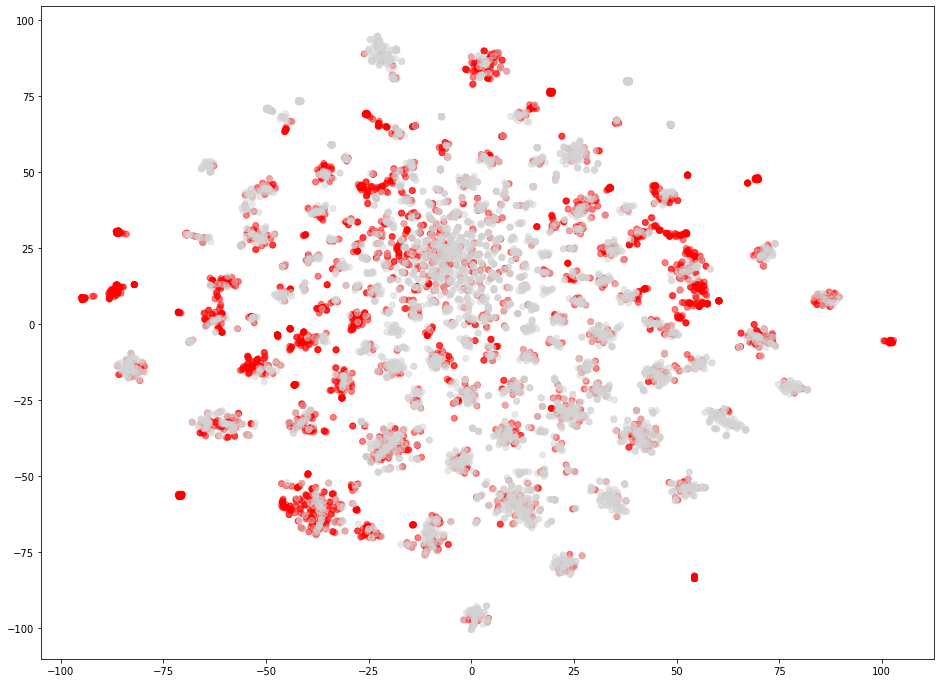

In [55]:
tsne = TSNE(n_components=2, n_jobs=-1)
tsne_decomposed = tsne.fit_transform(svd_encoded_train)

colormap = ['lightgrey', 'red']
color = list(map(lambda x: colormap[x], train_targets))

fig = plt.figure(figsize=(16, 12))
plt.scatter(tsne_decomposed[:, 0], tsne_decomposed[:, 1], c=color, alpha=0.5)

plt.show()

## 3.4. Doc2Vec Encoding <a id="3.4"></a>
[Back to Top](#top)

In [56]:
def get_doc2vec_model(corpus, max_epochs=100, vec_size=20, nth_log=10):
    documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(corpus)]
    
    alpha = 0.025

    model = Doc2Vec(vector_size=vec_size, alpha=alpha, min_alpha=0.00025, min_count=1, dm =1, negative=0)
    model.build_vocab(documents)

    for epoch in range(max_epochs):
        if epoch % nth_log == 0 or epoch == (max_epochs - 1):
            print('iteration {:4d}/{:4d}'.format(epoch + 1, max_epochs))
        model.train(documents, total_examples=model.corpus_count, epochs=epoch)
        
        # decrease the learning rate
        model.alpha -= 0.0002
        
        # fix the learning rate, no decay
        model.min_alpha = model.alpha
        
    return model

In [57]:
def doc2vec_encoding(corpus, model):
    return [model.infer_vector(word_tokenize(sentence)) for sentence in corpus]

In [58]:
'''Test'''
temp = [
    'i am doing well',
    'i am doing what',
    'i am doing so what'
]
model = get_doc2vec_model(temp)
print('Total Encoded')
print(doc2vec_encoding(temp, model))

print('Part Encoded')
print(doc2vec_encoding(temp[1:], model))

/Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/venv/lib/python3.7/site-packages/gensim/models/base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


iteration    1/ 100
iteration   11/ 100
iteration   21/ 100
iteration   31/ 100
iteration   41/ 100
iteration   51/ 100
iteration   61/ 100
iteration   71/ 100
iteration   81/ 100
iteration   91/ 100
iteration  100/ 100
Total Encoded
[array([-0.02397918, -0.01141913,  0.01781973,  0.01540972,  0.00911745,
        0.01796773,  0.01621935, -0.01195057, -0.0135413 ,  0.0161228 ,
        0.00800137, -0.0181686 , -0.01272935,  0.00843015, -0.01930418,
       -0.00610707,  0.02284007, -0.01385006, -0.01756077,  0.01184797],
      dtype=float32), array([-0.01248046,  0.02381584, -0.01729411, -0.01785217,  0.0025655 ,
       -0.00076126,  0.02478824, -0.01810708, -0.004715  , -0.02057263,
       -0.00611265, -0.00615132, -0.02074317, -0.00587506,  0.01798629,
        0.01620816,  0.02062332,  0.01707063, -0.01143758, -0.02191495],
      dtype=float32), array([-0.01963261,  0.0103353 ,  0.00773404,  0.01739251, -0.01039566,
       -0.01327107, -0.009047  ,  0.01320521,  0.02246457,  0.00964855,

In [59]:
model = get_doc2vec_model(corpus, max_epochs=15, vec_size=50, nth_log=3)
doc2vec_encoded_train = doc2vec_encoding(corpus_train, model)
doc2vec_encoded_test = doc2vec_encoding(corpus_test, model)

print('Shape of Train\t:{}'.format(np.array(doc2vec_encoded_train).shape))
print('Shape of Test\t:{}'.format(np.array(doc2vec_encoded_test).shape))
print('Sample Data >>\n{}'.format(doc2vec_encoded_train))

iteration    1/  15
iteration    4/  15
iteration    7/  15
iteration   10/  15
iteration   13/  15
iteration   15/  15


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 4. Data Modeling <a id="4"></a>
[Back to Top](#top)

## 4.1. Index Encoding + RNN Modeling <a id="4.1"></a>
[Back to Top](#top)

### 4.1.1. Make Train and Test Data <a id="4.1.1"></a>
[Back to Top](#top)

In [60]:
def pad_sequence(x_train, x_test, sequence_length):
    x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=sequence_length, padding='post', truncating='post')
    x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=sequence_length, padding='post', truncating='post')
    
    return (x_train, x_test)

In [61]:
def load_data():
    x_train = np.asarray(index_encoded_train)
    y_train = np.asarray(train_targets)
    x_test = np.asarray(index_encoded_test)
    
    sequence_length = 25
    x_train, x_test = pad_sequence(x_train, x_test, sequence_length)

    return (x_train, y_train), (x_test)

In [62]:
(x_train, y_train), (x_test) = load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7613, 25)
(7613,)
(3263, 25)


### 4.1.2. RNN Modeling <a id="4.1.2"></a>
[Back to Top](#top)

In [63]:
class TweetModel(keras.Model):
    def __init__(self, vocab_size, embedding_dim, sequence_length):
        
        super(TweetModel, self).__init__()
        
        self.embedding = keras.layers.Embedding(vocab_size, embedding_dim, input_length=sequence_length, name='embedding')
        
        self.lstm1 = keras.layers.Bidirectional(keras.layers.LSTM(1024), name='lstm1')
        self.drop1 = keras.layers.Dropout(0.5, name='drop1')
        
        self.dense2 = keras.layers.Dense(256, name='dense2')
        self.norm2 = keras.layers.BatchNormalization(name='norm2')
        self.relu2 = keras.layers.Activation(keras.activations.relu, name='relu2')
        self.drop2 = keras.layers.Dropout(0.5, name='drop2')

        self.dense3 = keras.layers.Dense(64, name='dense3')
        self.norm3 = keras.layers.BatchNormalization(name='norm3')
        self.relu3 = keras.layers.Activation(keras.activations.relu, name='relu3')
        self.drop3 = keras.layers.Dropout(0.5, name='drop3')
        
        self.dense4 = keras.layers.Dense(1, activation='sigmoid', name='dense4')
        
    def call(self, inputs, training=False):
        inputs = self.embedding(inputs)
        
        layer1 = self.lstm1(inputs)
        layer1 = self.drop1(layer1)
        
        layer2 = self.dense2(layer1)
        layer2 = self.norm2(layer2)
        layer2 = self.relu2(layer2)
        layer2 = self.drop2(layer2)

        layer3 = self.dense3(layer2)
        layer3 = self.norm3(layer3)
        layer3 = self.relu3(layer3)
        layer3 = self.drop3(layer3)

        outputs = self.dense4(layer3)
        
        return outputs

In [64]:
vocab_size = len(word2idx)
embedding_dim = 1000
sequence_length = 25

model = TweetModel(vocab_size, embedding_dim, sequence_length)
temp = keras.Input(shape=(sequence_length, ))
model(temp)
model.summary()

Model: "tweet_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 1000)          17769000  
_________________________________________________________________
lstm1 (Bidirectional)        (None, 2048)              16588800  
_________________________________________________________________
drop1 (Dropout)              (None, 2048)              0         
_________________________________________________________________
dense2 (Dense)               (None, 256)               524544    
_________________________________________________________________
norm2 (BatchNormalization)   (None, 256)               1024      
_________________________________________________________________
relu2 (Activation)           (None, 256)               0         
_________________________________________________________________
drop2 (Dropout)              (None, 256)               

### 4.1.3. Performance Function <a id="4.1.3"></a>
[Back to Top](#top)

In [65]:
def loss_fn(model, features, labels, training=True):
    outputs = model(features, training)
    labels = tf.cast(labels, tf.float32)
    loss = -tf.reduce_mean(labels * tf.math.log(outputs) + (1 - labels) * tf.math.log(1 - outputs))
    return loss

In [66]:
def accuracy_fn(model, features, labels, training=False):
    outputs = model(features, training)
    prediction = tf.cast(outputs > 0.5, tf.int64)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, labels), tf.float32))
    return accuracy

### 4.1.4. Training Hyper Parameter <a id="4.1.4"></a>
[Back to Top](#top)

In [67]:
learning_rate = 0.001
batch_size = 128
epochs = 5
iterations = len(x_train) // batch_size

In [68]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(10000)
dataset = dataset.prefetch(10000)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

dataset_iterator = iter(dataset)

sample_x, sample_y = dataset_iterator.get_next()
print('Sample x >>\n{}'.format(sample_x))
print('Sample y >>\n{}'.format(sample_y))

Sample x >>
[[ 5250 15307 13827 ...     0     0     0]
 [15865 16990  5739 ...     0     0     0]
 [ 6381  9498  6910 ...     0     0     0]
 ...
 [ 4364 12950  8563 ...     0     0     0]
 [ 1261 17612  9014 ...     0     0     0]
 [16968  7680 10135 ...     0     0     0]]
Sample y >>
[1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 0 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 1 1
 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 0]


In [69]:
lr_decay = keras.optimizers.schedules.ExponentialDecay(learning_rate, 10, 0.8)
optimizer = keras.optimizers.Adam(lr_decay)

### 4.1.5. Checkpoint and Summary <a id="4.1.5"></a>
[Back to Top](#top)

This process is only done in locally, to save while training.<br>

In [70]:
def load_checkpoint(model, checkpoint_dir):
    print('** load checkpoint in {} **'.format(checkpoint_dir))
    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt:
        latest_checkpoint_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(os.path.join(checkpoint_dir, latest_checkpoint_name))
        counter = int(latest_checkpoint_name.split('-')[1])
        print('** checkpoint {} restored **'.format(latest_checkpoint_name))
        return True, counter
    else:
        print('** checkpoint not found **')
        return False, 0

In [73]:
current_dir = os.getcwd()
checkpoint_dir = 'checkpoints'
model_dir = 'TweetModel'
log_dir = 'logs'

checkpoint_dir = os.path.join(current_dir, checkpoint_dir, model_dir)
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)

log_dir = os.path.join(current_dir, log_dir, model_dir)

In [74]:
checkpoint = tf.train.Checkpoint(dnn=model)
could_load, checkpoint_counter = load_checkpoint(model, checkpoint_dir)
if could_load:
    start_epoch = checkpoint_counter // iterations
    start_iteration = checkpoint_counter % iterations
    counter = checkpoint_counter
else:
    start_epoch = 0
    start_iteration = 0
    counter = 0

** load checkpoint in /Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/Real or Not NLP with Disaster Tweets/checkpoints/TweetModel **
** checkpoint not found **


In [75]:
summary_writer = tf.summary.create_file_writer(logdir=log_dir)

### 4.1.6. Training <a id="4.1.6"></a>
[Back to Top](#top)

In [76]:
with summary_writer.as_default():
    for epoch in range(start_epoch, epochs):
        train_loss = 0.
        train_acc = 0.

        for iteration in range(start_iteration, iterations):
            train_features, train_labels = dataset_iterator.get_next()

            with tf.GradientTape() as tape:
                loss = loss_fn(model, train_features, train_labels, True)
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            train_loss += loss

            acc = accuracy_fn(model, train_features, train_labels, False)
            train_acc += acc
            
            tf.summary.scalar('loss', loss, step=counter)
            tf.summary.scalar('accuracy', acc, step=counter)

            if iteration % 5 == 0 or iteration == (iterations - 1):
                print('Epoch {:4d} [{:3d}/{:3d}] batch_loss={:7.4f}, batch_accuracy={:.2%}'.format(epoch + 1, iteration + 1, iterations, loss, acc))

            counter += 1
            if counter % 50 == 0:
                checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))

        train_loss /= iterations
        train_acc /= iterations

        tf.summary.scalar('epoch_loss', train_loss, step=counter)
        tf.summary.scalar('epoch_accuracy', train_acc, step=counter)

        
        val_features = tf.convert_to_tensor(x_train)
        val_labels = tf.convert_to_tensor(y_train)
        val_loss = loss_fn(model, val_features, val_labels, False)
        val_acc = accuracy_fn(model, val_features, val_labels, False)

        tf.summary.scalar('total_loss', val_loss, step=counter)
        tf.summary.scalar('total_accuracy', val_acc, step=counter)

        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        print('** Epoch {:4d} finished TRAINING loss={:7.4f} accuracy={:.2%}, VALIDATION loss={:7.4f} accuarcy={:.2%} **\n'.format(epoch + 1, train_loss, train_acc, val_loss, val_acc))

Epoch    1 [  1/ 59] batch_loss= 0.8882, batch_accuracy=46.88%
Epoch    1 [  6/ 59] batch_loss= 0.8448, batch_accuracy=53.36%
Epoch    1 [ 11/ 59] batch_loss= 0.7962, batch_accuracy=60.16%
Epoch    1 [ 16/ 59] batch_loss= 0.8502, batch_accuracy=50.00%
Epoch    1 [ 21/ 59] batch_loss= 0.8288, batch_accuracy=53.12%
Epoch    1 [ 26/ 59] batch_loss= 0.8368, batch_accuracy=50.78%
Epoch    1 [ 31/ 59] batch_loss= 0.8059, batch_accuracy=58.59%
Epoch    1 [ 36/ 59] batch_loss= 0.7734, batch_accuracy=56.25%
Epoch    1 [ 41/ 59] batch_loss= 0.8059, batch_accuracy=58.59%
Epoch    1 [ 46/ 59] batch_loss= 0.8185, batch_accuracy=50.78%
Epoch    1 [ 51/ 59] batch_loss= 0.8189, batch_accuracy=53.91%
Epoch    1 [ 56/ 59] batch_loss= 0.8122, batch_accuracy=46.88%
Epoch    1 [ 59/ 59] batch_loss= 0.8077, batch_accuracy=42.62%
** Epoch    1 finished TRAINING loss= 0.8241 accuracy=55.06%, VALIDATION loss= 0.6961 accuarcy=42.97% **

Epoch    2 [  1/ 59] batch_loss= 0.7860, batch_accuracy=39.06%
Epoch    2 [

### 4.1.7. Evaluation <a id="4.1.7"></a>
[Back to Top](#top)

Threshold value to say 'this tweet is about disaster' is 0.5 in default.<br>
However, there's an inbalance in Disaster/Non-Disaster data.<br>
Therefore, change the threshold value to see whether the value effect accuracy or not.<br>

In [77]:
### load when there is checkpoint saved locally
_, _ = load_checkpoint(model, checkpoint_dir)

features = tf.convert_to_tensor(x_train)
labels = tf.convert_to_tensor(y_train)
loss = loss_fn(model, features, labels, False)
accuracy = accuracy_fn(model, features, labels, False)

print('Final Score for Labeled Data >> loss={:7.4f} accuracy={:.2%}'.format(loss, accuracy))

** load checkpoint in /Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/Real or Not NLP with Disaster Tweets/checkpoints/TweetModel **
** checkpoint TweetModel-295-15 restored **
Final Score for Labeled Data >> loss= 0.7341 accuracy=42.97%


In [84]:
accuracy_score = list()
threshold = np.arange(0.585, 0.60, 0.001)

for th in threshold:
    prediction = model.predict(x_train)
    prediction = tf.cast(prediction > th, tf.int64)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_train), tf.float32))
    
    print('Accuracy at {:.5f}: {:.2%}'.format(th, accuracy))
    
    accuracy_score.append(accuracy)

Accuracy at 0.58500: 42.98%
Accuracy at 0.58600: 42.98%
Accuracy at 0.58700: 43.12%
Accuracy at 0.58800: 47.20%
Accuracy at 0.58900: 55.57%
Accuracy at 0.59000: 57.02%
Accuracy at 0.59100: 57.03%
Accuracy at 0.59200: 57.03%
Accuracy at 0.59300: 57.03%
Accuracy at 0.59400: 57.03%
Accuracy at 0.59500: 57.03%
Accuracy at 0.59600: 57.03%
Accuracy at 0.59700: 57.03%
Accuracy at 0.59800: 57.03%
Accuracy at 0.59900: 57.03%
Accuracy at 0.60000: 57.03%


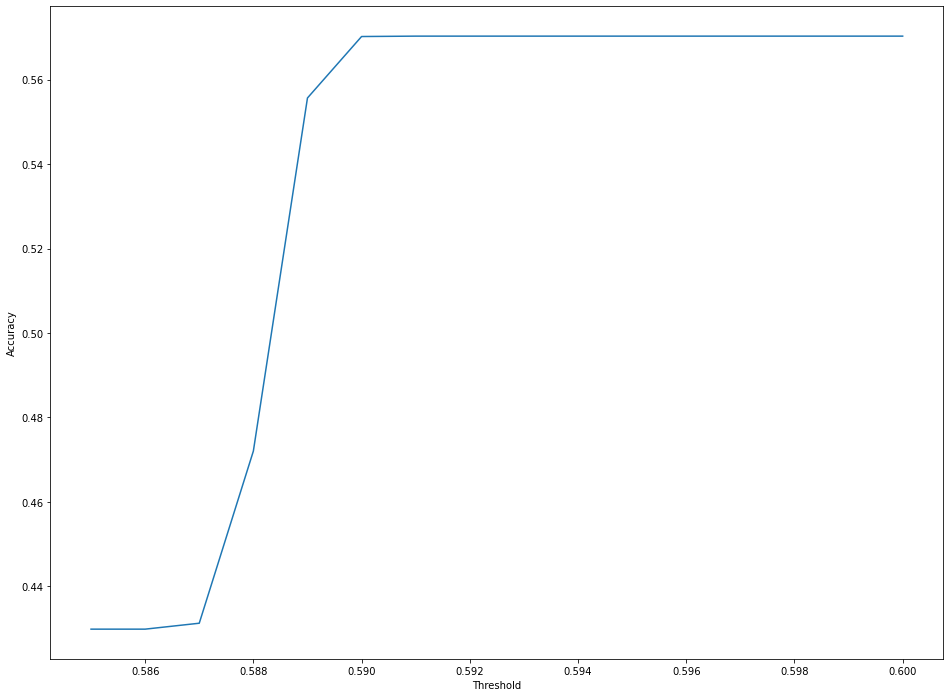

In [87]:
fig = plt.figure(figsize=(16, 12))
plt.plot(threshold, np.array(accuracy_score))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

In [93]:
prediction = model.predict(x_test)
prediction = tf.cast(prediction > 0.589, tf.int64)

submission = combined_test.copy()
submission['target'] = prediction.numpy()
submission = submission.drop(['keyword', 'location', 'text'], axis=1)
submission

,id,target
0,0,0
1,2,1
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,1
3259,10865,0
3260,10868,0
3261,10874,0


In [94]:
submission.to_csv('./data/submission/submission.csv', encoding='utf-8', index=False)

## 4.2. Doc2Vec Encoding + DNN Modeling <a id="4.2"></a>
[Back to Top](#top)

### 4.2.1. Make Train and Test Data <a id="4.2.1"></a>
[Back to Top](#top)

In [120]:
def load_data():
    x_train = np.asarray(doc2vec_encoded_train)
    y_train = np.asarray(train_targets)
    x_test = np.asarray(doc2vec_encoded_test)
    
    return (x_train, y_train), (x_test)

In [121]:
(x_train, y_train), (x_test) = load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(7613, 50)
(7613,)
(3263, 50)


### 4.2.2. DNN Modeling <a id="4.2.2"></a>
[Back to Top](#top)

In [122]:
class TweetModelDNN(keras.Model):
    def __init__(self):
        
        super(TweetModelDNN, self).__init__()
        
        self.dense1 = keras.layers.Dense(256, name='dense1')
        self.norm1 = keras.layers.BatchNormalization(name='norm1')
        self.relu1 = keras.layers.Activation(keras.activations.relu, name='relu1')
        self.drop1 = keras.layers.Dropout(0.5, name='drop1')

        self.dense2 = keras.layers.Dense(128, name='dense2')
        self.norm2 = keras.layers.BatchNormalization(name='norm2')
        self.relu2 = keras.layers.Activation(keras.activations.relu, name='relu2')
        self.drop2 = keras.layers.Dropout(0.5, name='drop2')

        self.dense3 = keras.layers.Dense(128, name='dense3')
        self.norm3 = keras.layers.BatchNormalization(name='norm3')
        self.relu3 = keras.layers.Activation(keras.activations.relu, name='relu3')
        self.drop3 = keras.layers.Dropout(0.5, name='drop3')

        self.dense4 = keras.layers.Dense(64, name='dense4')
        self.norm4 = keras.layers.BatchNormalization(name='norm4')
        self.relu4 = keras.layers.Activation(keras.activations.relu, name='relu4')
        self.drop4 = keras.layers.Dropout(0.5, name='drop4')

        self.dense5 = keras.layers.Dense(1, activation='sigmoid', name='dense5')
        
    def call(self, inputs, training=False):

        layer1 = self.dense1(inputs)
        layer1 = self.norm1(layer1)
        layer1 = self.relu1(layer1)
        layer1 = self.drop1(layer1)
        
        layer2 = self.dense2(layer1)
        layer2 = self.norm2(layer2)
        layer2 = self.relu2(layer2)
        layer2 = self.drop2(layer2)

        layer3 = self.dense3(layer2)
        layer3 = self.norm3(layer3)
        layer3 = self.relu3(layer3)
        layer3 = self.drop3(layer3)

        layer4 = self.dense4(layer3)
        layer4 = self.norm4(layer4)
        layer4 = self.relu4(layer4)
        layer4 = self.drop4(layer4)

        outputs = self.dense5(layer4)
        
        return outputs

In [123]:
model = TweetModelDNN()
temp = keras.Input(shape=x_train.shape[1:])
model(temp)
model.summary()

Model: "tweet_model_dnn_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense1 (Dense)               (None, 256)               13056     
_________________________________________________________________
norm1 (BatchNormalization)   (None, 256)               1024      
_________________________________________________________________
relu1 (Activation)           (None, 256)               0         
_________________________________________________________________
drop1 (Dropout)              (None, 256)               0         
_________________________________________________________________
dense2 (Dense)               (None, 128)               32896     
_________________________________________________________________
norm2 (BatchNormalization)   (None, 128)               512       
_________________________________________________________________
relu2 (Activation)           (None, 128)         

### 4.2.3. Performance Function <a id="4.2.3"></a>
[Back to Top](#top)

In [124]:
def loss_fn(model, features, labels, training=True):
    outputs = model(features, training)
    labels = tf.cast(labels, tf.float32)
    loss = -tf.reduce_mean(labels * tf.math.log(outputs) + (1 - labels) * tf.math.log(1 - outputs))
    return loss

In [125]:
def accuracy_fn(model, features, labels, training=False):
    outputs = model(features, training)
    prediction = tf.cast(outputs > 0.5, tf.int64)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, labels), tf.float32))
    return accuracy

### 4.2.4. Training Hyper Parameter <a id="4.2.4"></a>
[Back to Top](#top)

In [126]:
learning_rate = 0.001
batch_size = 128
epochs = 5
iterations = len(x_train) // batch_size

In [127]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
dataset = dataset.shuffle(10000)
dataset = dataset.prefetch(10000)
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

dataset_iterator = iter(dataset)

sample_x, sample_y = dataset_iterator.get_next()
print('Sample x >>\n{}'.format(sample_x))
print('Sample y >>\n{}'.format(sample_y))

Sample x >>
[[ 0.00191784 -0.00760486 -0.00296826 ... -0.00639583 -0.00709816
  -0.00477953]
 [-0.00450779 -0.00767217 -0.00852991 ...  0.00958461 -0.00429284
   0.00925135]
 [ 0.00595561  0.00363385  0.0012299  ...  0.00268709 -0.00184123
  -0.00678198]
 ...
 [-0.00413551  0.00555852  0.00716212 ... -0.00219915  0.00646762
   0.0092608 ]
 [-0.00529937 -0.00336405 -0.00483208 ...  0.00363198  0.00913919
  -0.00909026]
 [ 0.00084063  0.00041235  0.00575907 ...  0.00894788 -0.00437043
   0.00882269]]
Sample y >>
[0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0
 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 0 1]


In [128]:
lr_decay = keras.optimizers.schedules.ExponentialDecay(learning_rate, 10, 0.8)
optimizer = keras.optimizers.Adam(lr_decay)

### 4.2.5. Checkpoint and Summary <a id="4.2.5"></a>
[Back to Top](#top)

This process is only done in locally, to save while training.<br>

In [129]:
def load_checkpoint(model, checkpoint_dir):
    print('** load checkpoint in {} **'.format(checkpoint_dir))
    ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
    if ckpt:
        latest_checkpoint_name = os.path.basename(ckpt.model_checkpoint_path)
        checkpoint = tf.train.Checkpoint(dnn=model)
        checkpoint.restore(os.path.join(checkpoint_dir, latest_checkpoint_name))
        counter = int(latest_checkpoint_name.split('-')[1])
        print('** checkpoint {} restored **'.format(latest_checkpoint_name))
        return True, counter
    else:
        print('** checkpoint not found **')
        return False, 0

In [130]:
current_dir = os.getcwd()
checkpoint_dir = 'checkpoints'
model_dir = 'TweetModelDNN'
log_dir = 'logs'

checkpoint_dir = os.path.join(current_dir, checkpoint_dir, model_dir)
os.makedirs(checkpoint_dir, exist_ok=True)
checkpoint_prefix = os.path.join(checkpoint_dir, model_dir)

log_dir = os.path.join(current_dir, log_dir, model_dir)

In [131]:
checkpoint = tf.train.Checkpoint(dnn=model)
could_load, checkpoint_counter = load_checkpoint(model, checkpoint_dir)
if could_load:
    start_epoch = checkpoint_counter // iterations
    start_iteration = checkpoint_counter % iterations
    counter = checkpoint_counter
else:
    start_epoch = 0
    start_iteration = 0
    counter = 0

** load checkpoint in /Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/Real or Not NLP with Disaster Tweets/checkpoints/TweetModelDNN **
** checkpoint not found **


In [132]:
summary_writer = tf.summary.create_file_writer(logdir=log_dir)

### 4.2.6. Training <a id="4.2.6"></a>
[Back to Top](#top)

In [133]:
with summary_writer.as_default():
    for epoch in range(start_epoch, epochs):
        train_loss = 0.
        train_acc = 0.

        for iteration in range(start_iteration, iterations):
            train_features, train_labels = dataset_iterator.get_next()

            with tf.GradientTape() as tape:
                loss = loss_fn(model, train_features, train_labels, True)
            grads = tape.gradient(loss, model.trainable_variables)
            optimizer.apply_gradients(zip(grads, model.trainable_variables))

            train_loss += loss

            acc = accuracy_fn(model, train_features, train_labels, False)
            train_acc += acc
            
            tf.summary.scalar('loss', loss, step=counter)
            tf.summary.scalar('accuracy', acc, step=counter)

            if iteration % 5 == 0 or iteration == (iterations - 1):
                print('Epoch {:4d} [{:3d}/{:3d}] batch_loss={:7.4f}, batch_accuracy={:.2%}'.format(epoch + 1, iteration + 1, iterations, loss, acc))

            counter += 1
            if counter % 50 == 0:
                checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))

        train_loss /= iterations
        train_acc /= iterations

        tf.summary.scalar('epoch_loss', train_loss, step=counter)
        tf.summary.scalar('epoch_accuracy', train_acc, step=counter)

        
        val_features = tf.convert_to_tensor(x_train)
        val_labels = tf.convert_to_tensor(y_train)
        val_loss = loss_fn(model, val_features, val_labels, False)
        val_acc = accuracy_fn(model, val_features, val_labels, False)

        tf.summary.scalar('total_loss', val_loss, step=counter)
        tf.summary.scalar('total_accuracy', val_acc, step=counter)

        checkpoint.save(file_prefix=checkpoint_prefix + '-{}'.format(counter))
        print('** Epoch {:4d} finished TRAINING loss={:7.4f} accuracy={:.2%}, VALIDATION loss={:7.4f} accuarcy={:.2%} **\n'.format(epoch + 1, train_loss, train_acc, val_loss, val_acc))

Epoch    1 [  1/ 59] batch_loss= 0.8461, batch_accuracy=52.16%
Epoch    1 [  6/ 59] batch_loss= 0.8590, batch_accuracy=59.38%
Epoch    1 [ 11/ 59] batch_loss= 0.7957, batch_accuracy=55.47%
Epoch    1 [ 16/ 59] batch_loss= 0.7998, batch_accuracy=57.03%
Epoch    1 [ 21/ 59] batch_loss= 0.7958, batch_accuracy=61.72%
Epoch    1 [ 26/ 59] batch_loss= 0.7981, batch_accuracy=55.47%
Epoch    1 [ 31/ 59] batch_loss= 0.7724, batch_accuracy=63.28%
Epoch    1 [ 36/ 59] batch_loss= 0.7683, batch_accuracy=56.25%
Epoch    1 [ 41/ 59] batch_loss= 0.7671, batch_accuracy=62.50%
Epoch    1 [ 46/ 59] batch_loss= 0.7715, batch_accuracy=55.47%
Epoch    1 [ 51/ 59] batch_loss= 0.7827, batch_accuracy=55.47%
Epoch    1 [ 56/ 59] batch_loss= 0.7794, batch_accuracy=61.72%
Epoch    1 [ 59/ 59] batch_loss= 0.7439, batch_accuracy=62.30%
** Epoch    1 finished TRAINING loss= 0.7993 accuracy=57.22%, VALIDATION loss= 0.6901 accuarcy=57.03% **

Epoch    2 [  1/ 59] batch_loss= 0.7712, batch_accuracy=60.94%
Epoch    2 [

### 4.2.7. Evaluation <a id="4.2.7"></a>
[Back to Top](#top)

Threshold value to say 'this tweet is about disaster' is 0.5 in default.<br>
However, there's an inbalance in Disaster/Non-Disaster data.<br>
Therefore, change the threshold value to see whether the value effect accuracy or not.<br>

In [134]:
### load when there is checkpoint saved locally
_, _ = load_checkpoint(model, checkpoint_dir)

features = tf.convert_to_tensor(x_train)
labels = tf.convert_to_tensor(y_train)
loss = loss_fn(model, features, labels, False)
accuracy = accuracy_fn(model, features, labels, False)

print('Final Score for Labeled Data >> loss={:7.4f} accuracy={:.2%}'.format(loss, accuracy))

** load checkpoint in /Users/dhsong/Workspaces/Practices/Kaggle Data Analysis/Real or Not NLP with Disaster Tweets/checkpoints/TweetModelDNN **
** checkpoint TweetModelDNN-295-10 restored **
Final Score for Labeled Data >> loss= 0.6895 accuracy=57.03%


In [135]:
accuracy_score = list()
threshold = np.arange(0.0, 1.0, 0.1)

for th in threshold:
    prediction = model.predict(x_train)
    prediction = tf.cast(prediction > th, tf.int64)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_train), tf.float32))
    
    print('Accuracy at {:.5f}: {:.2%}'.format(th, accuracy))
    
    accuracy_score.append(accuracy)

Accuracy at 0.00000: 42.97%
Accuracy at 0.10000: 42.97%
Accuracy at 0.20000: 42.97%
Accuracy at 0.30000: 42.97%
Accuracy at 0.40000: 42.97%
Accuracy at 0.50000: 57.03%
Accuracy at 0.60000: 57.03%
Accuracy at 0.70000: 57.03%
Accuracy at 0.80000: 57.03%
Accuracy at 0.90000: 57.03%


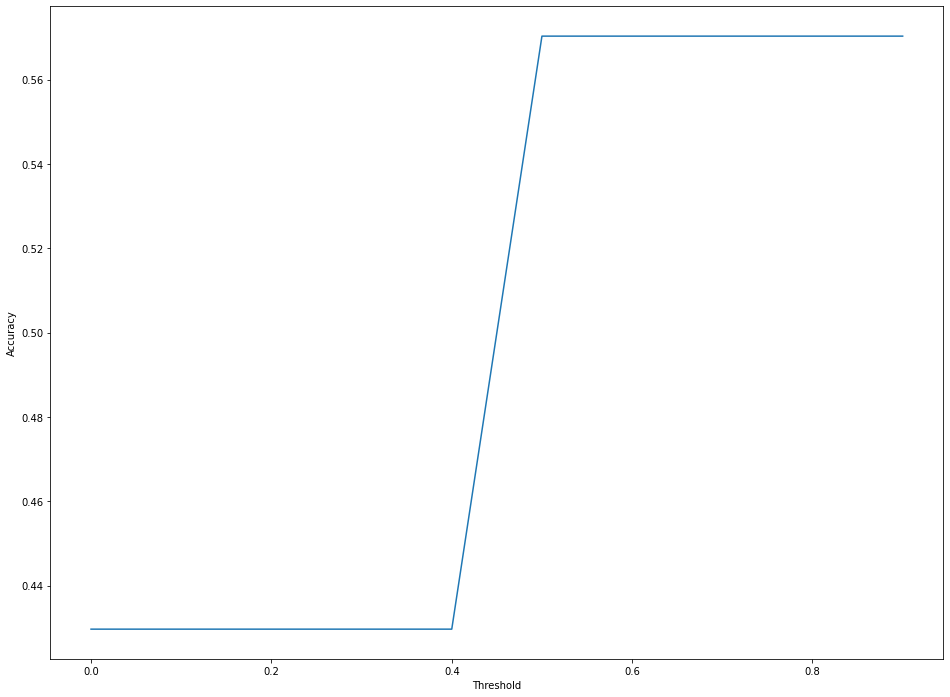

In [136]:
fig = plt.figure(figsize=(16, 12))
plt.plot(threshold, np.array(accuracy_score))
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.show()

In [137]:
prediction = model.predict(x_test)
prediction = tf.cast(prediction > 0.5, tf.int64)

submission = combined_test.copy()
submission['target'] = prediction.numpy()
submission = submission.drop(['keyword', 'location', 'text'], axis=1)
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [138]:
submission.to_csv('./data/submission/submission_dnn.csv', encoding='utf-8', index=False)